### Datos que contiene cada columna ###
https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as matplot

%matplotlib inline

# Extract data from Parquet file

In [37]:
url = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet'
taxi_dataframe = pd.read_parquet(url, engine='pyarrow')
taxi_dataframe

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


In [38]:
taxi_dataframe.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

# Transform data

Choosing the columns we are interested in

In [39]:
taxi_dataframe = taxi_dataframe[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]

In [40]:
taxi_dataframe.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,0.80,1.0,211,148,1,16.10


#### Let see the data graphically

In [41]:
taxi_dataframe.hist(figsize=(30,20), bins=60)

There are columns that need some fixing:
- RatecodeID column, according to the pdf, only have six possible ID's. But we see different values.
- Negative values and huge amounts values in total_amount
- Years that are not 2024 and months different from january
- Huge trip distances or too low trip_distances convined with unproportional total_amount
- Doesn't appear graphically but there are NaN/null cells

In [ ]:
taxi_dataframe['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

#### Wrong data in column RatecodeID

A 99 was marked 28663 times as rate code.
- Context: RatecodeID is a column that indicates the type of fare applied, with a defined set of valid values.
- Action: Records with RatecodeID values that did not belong to the expected set were identified and removed.
- Impact: Ensures that all records in the dataset have recognized fare codes, enabling accurate analysis of fares by type.

In [ ]:
wrong_ratecode = taxi_dataframe[taxi_dataframe['RatecodeID'] > 6].shape[0]
total_data = taxi_dataframe.shape[0]

wrong_ratecode_percent = (wrong_ratecode / total_data) * 100
print(f'Número de campos erroneos en ratecode: {wrong_ratecode} \nPercentage of wronk RatecodeID over total of rows: {wrong_ratecode_percent:.3f}%')

Número de campos erroneos en ratecode: 28663 
Percentage of wronk RatecodeID over total of rows: 0.967%


#### Null or NaN data
- Context: The presence of null or NaN values in any key column could lead to incomplete or incorrect results in the analysis.
- Action: All records containing null or NaN values in essential columns were removed.
- Impact: This step ensures that all records in the dataset are complete and valid for analysis.

In [ ]:
null_data = taxi_dataframe.isna().sum().sum()

null_percent = (null_data / total_data) * 100
print(f'NaN/null data: {null_data} \nPercentage of NaN/null data over total of rows: {null_percent:.3f}%')

NaN/null data: 140162 
Percentage of NaN/null data over total of rows: 4.728%


All Nan/null data seems to be located in RatecodeID column

In [ ]:
wrong_ratecode_data = wrong_ratecode_percent + null_percent

print(f'Total incorrect data: {wrong_ratecode + null_data}')
print(f'Total over the column: {(((wrong_ratecode + null_data) / total_data) * 100):.3f}%')

f'Total of unwanted data in RatecodeId: {wrong_ratecode_data:.3f}%'

Total incorrect data: 168825
Total over the column: 5.695%


'Total of unwanted data in RatecodeId: 5.695%'

#### Negatives values in column total_amount.
- Context: Records with negative values were found in the total_amount column, which is inconsistent with the logic of the data (since a negative fare doesn’t make sense).
- Action: All records with negative values in total_amount were removed.
- Impact: This prevents distortion in future analyses, as these negative values do not reflect real fares.

In [ ]:
negative_values = taxi_dataframe[taxi_dataframe['total_amount'] < 0].shape[0]
negative_values_percent = (negative_values / total_data) * 100

negative_values_column = (negative_values / total_data) * 100

print(f"Negative percentage in 'total_amount': {negative_values_column:.2f}%")

Negative percentage in 'total_amount': 1.20%


Cleaning wrong data and null data in RatecodeID, and drop negative values in total_amount

In [ ]:
taxi_dataframe_filtered = taxi_dataframe[(taxi_dataframe['RatecodeID'] <= 6) & (taxi_dataframe['total_amount'] > 0)]

taxi_dataframe_filtered = taxi_dataframe_filtered.dropna()

print('''Data cleaning so far: ''')
print(taxi_dataframe_filtered['RatecodeID'].value_counts())
print('''\nDatos negativos en total_amount''')
print(taxi_dataframe_filtered[taxi_dataframe_filtered['total_amount'] < 0].shape[0])
print(f'\nCampos nulos: \n{taxi_dataframe_filtered.isnull().sum()}')

Data cleaning so far: 
RatecodeID
1.0    2630858
2.0      96658
5.0      18640
3.0       7617
4.0       6144
6.0          5
Name: count, dtype: int64

Datos negativos en total_amount
0

Campos nulos: 
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64


In [ ]:
print(f'Datos originales: {taxi_dataframe.shape}')

print(f'Datos filtrados: {taxi_dataframe_filtered.shape}')

Datos originales: (2964624, 8)
Datos filtrados: (2759922, 8)


Changing the data types of RatecodeID, PULocationID, DOLocationID, payment_type columns.

In [ ]:
for column in taxi_dataframe_filtered.columns:
    if 'ID' in column or 'payment_type' in column:
        taxi_dataframe_filtered.loc[:,column] = taxi_dataframe_filtered[column].astype('str')


C:\Users\dario.maroto\AppData\Local\Temp\ipykernel_11536\2506915822.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1.0' '1.0' '1.0' ... '1.0' '1.0' '1.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  taxi_dataframe_filtered.loc[:,column] = taxi_dataframe_filtered[column].astype('str')
C:\Users\dario.maroto\AppData\Local\Temp\ipykernel_11536\2506915822.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['186' '140' '236' ... '43' '142' '140']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  taxi_dataframe_filtered.loc[:,column] = taxi_dataframe_filtered[column].astype('str')
C:\Users\dario.maroto\AppData\Local\Temp\ipykernel_11536\2506915822.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pa

In [ ]:
taxi_dataframe_filtered.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [ ]:
taxi_dataframe_filtered

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,0.80,1.0,211,148,1,16.10
...,...,...,...,...,...,...,...,...
2824457,2024-01-31 23:10:28,2024-01-31 23:18:30,3.51,1.0,138,129,1,30.31
2824458,2024-01-31 23:01:04,2024-01-31 23:17:35,3.36,1.0,162,261,1,29.25
2824459,2024-01-31 23:08:13,2024-01-31 23:25:00,3.30,1.0,43,249,1,23.70
2824460,2024-01-31 23:49:46,2024-01-31 23:53:10,0.40,1.0,142,163,2,10.10


#### Let's see again the dataframe graphics

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

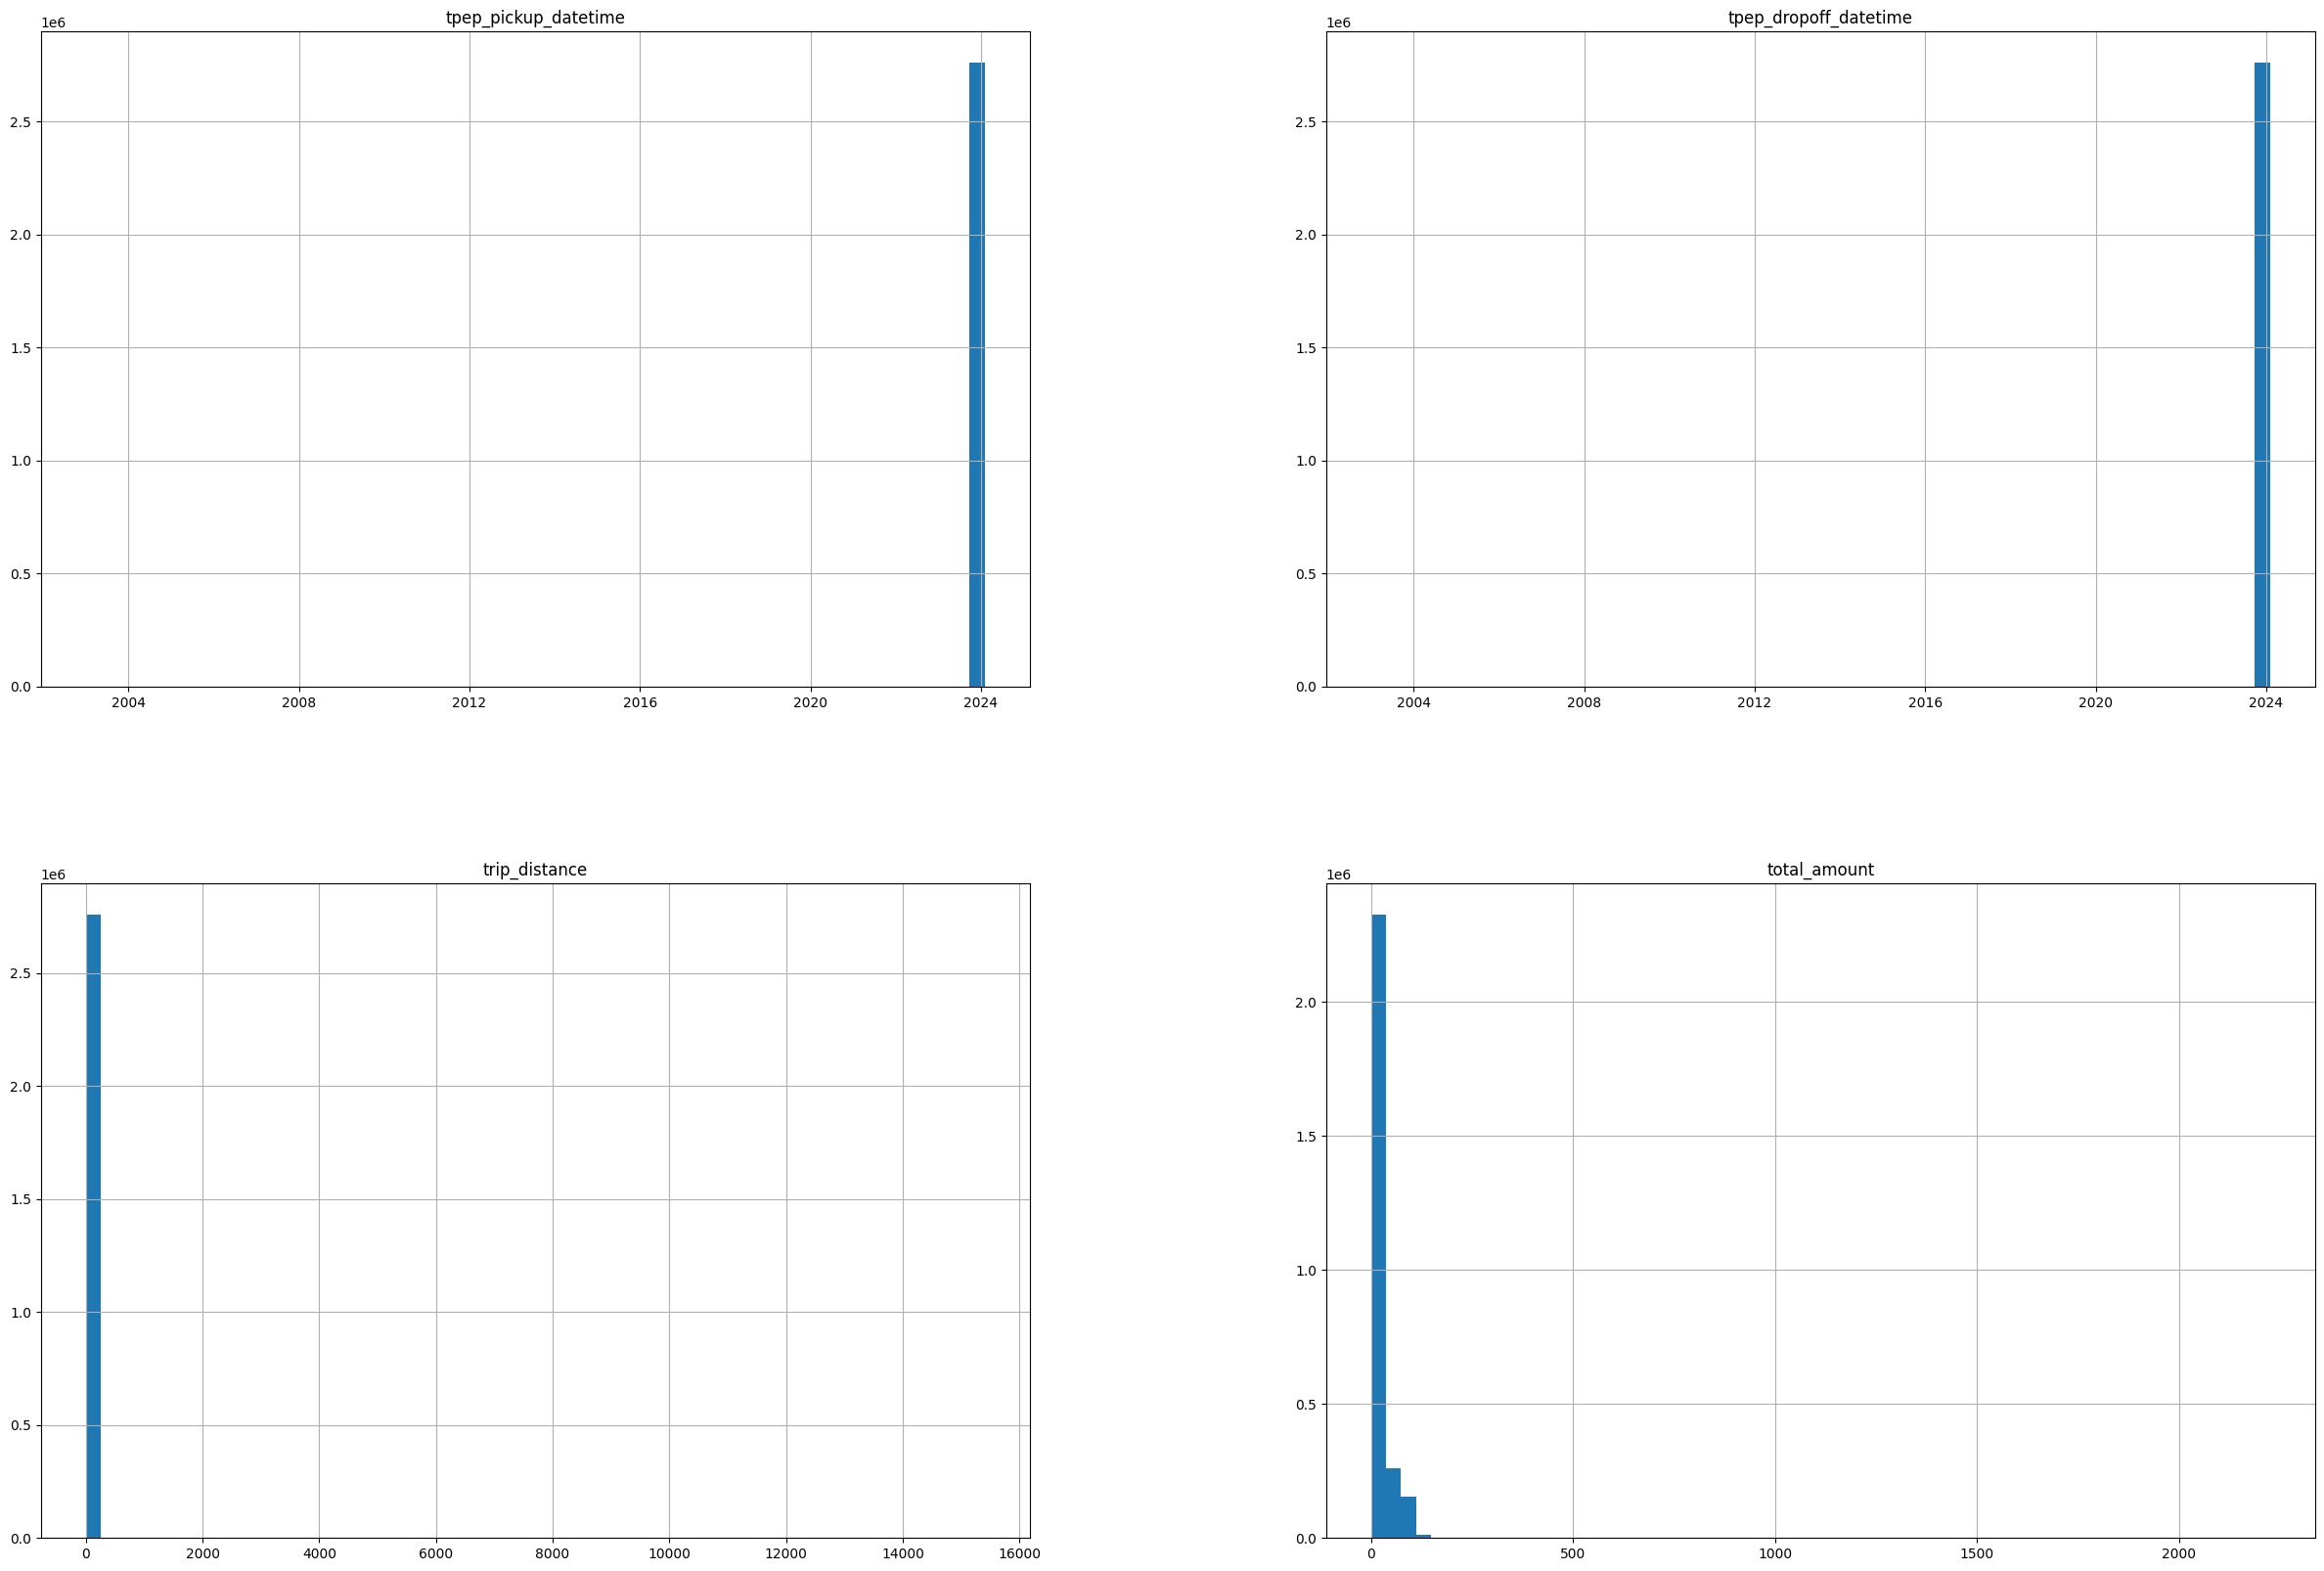

In [ ]:
taxi_dataframe_filtered.hist(figsize=(30,20), bins=60)

### Dealing and cleaning remaining problems in dataframe

- Context: The original dataset included data from different years and months.
- Action: The data was filtered to retain only records corresponding to January 2024.
- Impact: This step ensures that the analysis is specific to the period of interest, excluding data that is not relevant to the current investigation.

In [ ]:
not_2024 = taxi_dataframe_filtered.loc[
  taxi_dataframe_filtered['tpep_pickup_datetime'].dt.year < 2024, ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
  ]

not_january = taxi_dataframe_filtered.loc[
  taxi_dataframe_filtered['tpep_pickup_datetime'].dt.month > 1, 
  ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
  ]

print(f"Años diferentes a 2024: \n {not_2024} \n")

print(f"Meses distintos de enero: \n{not_january} \n")

Años diferentes a 2024: 
         tpep_pickup_datetime tpep_dropoff_datetime
256      2023-12-31 23:56:46   2024-01-01 00:12:06
369      2023-12-31 23:39:17   2023-12-31 23:42:00
753      2023-12-31 23:41:02   2023-12-31 23:48:03
2210     2023-12-31 23:57:17   2024-01-01 00:01:50
2615     2023-12-31 23:56:45   2024-01-01 00:00:28
2985     2023-12-31 23:49:12   2024-01-01 00:04:32
3176     2023-12-31 23:47:28   2023-12-31 23:57:07
4137     2023-12-31 23:58:35   2024-01-01 00:13:06
4142     2023-12-31 23:58:37   2024-01-01 00:08:37
8628     2023-12-31 23:54:27   2024-01-01 00:13:12
10915    2009-01-01 23:58:40   2009-01-02 00:01:40
53120    2002-12-31 22:59:39   2002-12-31 23:05:41
1230169  2009-01-01 23:30:39   2009-01-02 00:01:39
2558056  2009-01-01 00:24:09   2009-01-01 01:13:00 

Meses distintos de enero: 
        tpep_pickup_datetime tpep_dropoff_datetime
256      2023-12-31 23:56:46   2024-01-01 00:12:06
369      2023-12-31 23:39:17   2023-12-31 23:42:00
753      2023-12-31 23:41:0

The new variable "taxi_data_prep" contains only data of January 2024

In [ ]:
taxi_data_prep = taxi_dataframe_filtered.drop(
  taxi_dataframe_filtered[
  (taxi_dataframe_filtered['tpep_pickup_datetime'].dt.year != 2024)
  ].index)

taxi_data_prep = taxi_data_prep.drop(
  taxi_data_prep[
    (taxi_data_prep['tpep_pickup_datetime'].dt.month > 1) |
    (taxi_dataframe_filtered['tpep_dropoff_datetime'].dt.month > 1)
    ].index)

print('---- Months different to January ----')
print(taxi_data_prep.loc[
  ((taxi_data_prep['tpep_pickup_datetime'].dt.month > 1) &
    (taxi_dataframe_filtered['tpep_dropoff_datetime'].dt.month > 1)),
  ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
  ])

print('---- Years different to 2024 ---- ')
print(taxi_data_prep.loc[
  (taxi_data_prep['tpep_pickup_datetime'].dt.year != 2024), 
  # &(taxi_dataframe_filtered['tpep_pickup_datetime'].dt.month > 1),
  ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
  ])

C:\Users\dario.maroto\AppData\Local\Temp\ipykernel_11536\3736536068.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  taxi_data_prep[


---- Months different to January ----
Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime]
Index: []
---- Years different to 2024 ---- 
Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime]
Index: []


#### Removal of Outliers in Trip Distance and Total Amount.
- Context: Outliers were defined as records where the total fare (total_amount) was excessively high relative to the trip distance (trip_distance).
- Action: These outliers were removed using a set of predefined conditions for each distance range.
- Impact: The removal of outliers significantly reduced the dataset size, retaining only 30% of the original data, which suggests a large number of atypical or erroneous records.

In [ ]:
conditions = taxi_data_prep[    
    (taxi_data_prep['trip_distance'] <= 1) & (taxi_data_prep['total_amount'] > 10) |
    (taxi_data_prep['trip_distance'] <= 2) & (taxi_data_prep['total_amount'] > 15) |
    (taxi_data_prep['trip_distance'] <= 3) & (taxi_data_prep['total_amount'] > 20) |
    (taxi_data_prep['trip_distance'] <= 5) & (taxi_data_prep['total_amount'] > 35) |
    (taxi_data_prep['trip_distance'] <= 10) & (taxi_data_prep['total_amount'] > 50) |
    (taxi_data_prep['trip_distance'] <= 20) & (taxi_data_prep['total_amount'] > 100)
].index

taxi_df_cleaned = taxi_data_prep.drop(conditions, errors='ignore')

with_outliers = taxi_data_prep.shape[0]
without_outliers = taxi_df_cleaned.shape[0]

print("Number of rows with outliers:", with_outliers)

print("Number of row without outliers:", without_outliers)

print(f'Percent of rows without outliers {(without_outliers/with_outliers) * 100:.2f}%')

Number of rows with outliers: 2759316
Number of row without outliers: 782564
 Percent of rows without outliers 28.36%


### Calcular el promedio de gasto del mes de enero

In [ ]:
average_spent_january = taxi_df_cleaned['total_amount'].mean()
print(f'Media de gasto en el mes de enero: {average_spent_january:.2f}')

mode_january = taxi_df_cleaned['total_amount'].mode().to_string()

print(f'El gasto que más aparece en el mes de enero: {mode_january[-4:]}')

Media de gasto en el mes de enero: 27.29
El gasto que más aparece en el mes de enero: 16.8


### Calcular el promedio por día

In [ ]:
daily_totals = taxi_df_cleaned.groupby(taxi_df_cleaned['tpep_pickup_datetime'].dt.day)['total_amount'].mean()

# Calcular el número de días en enero
num_days = len(daily_totals)
print(num_days)

# Calcular el gasto promedio diario
average_daily_spent = daily_totals.mean()
print(f"El gasto promedio diario en enero de 2024 es: {average_daily_spent:.2f}")

31
El gasto promedio diario en enero de 2024 es: 27.41


# TODO: El pickup location se puede dejar como númerico y con mode se puede ver qué zona se repite más

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

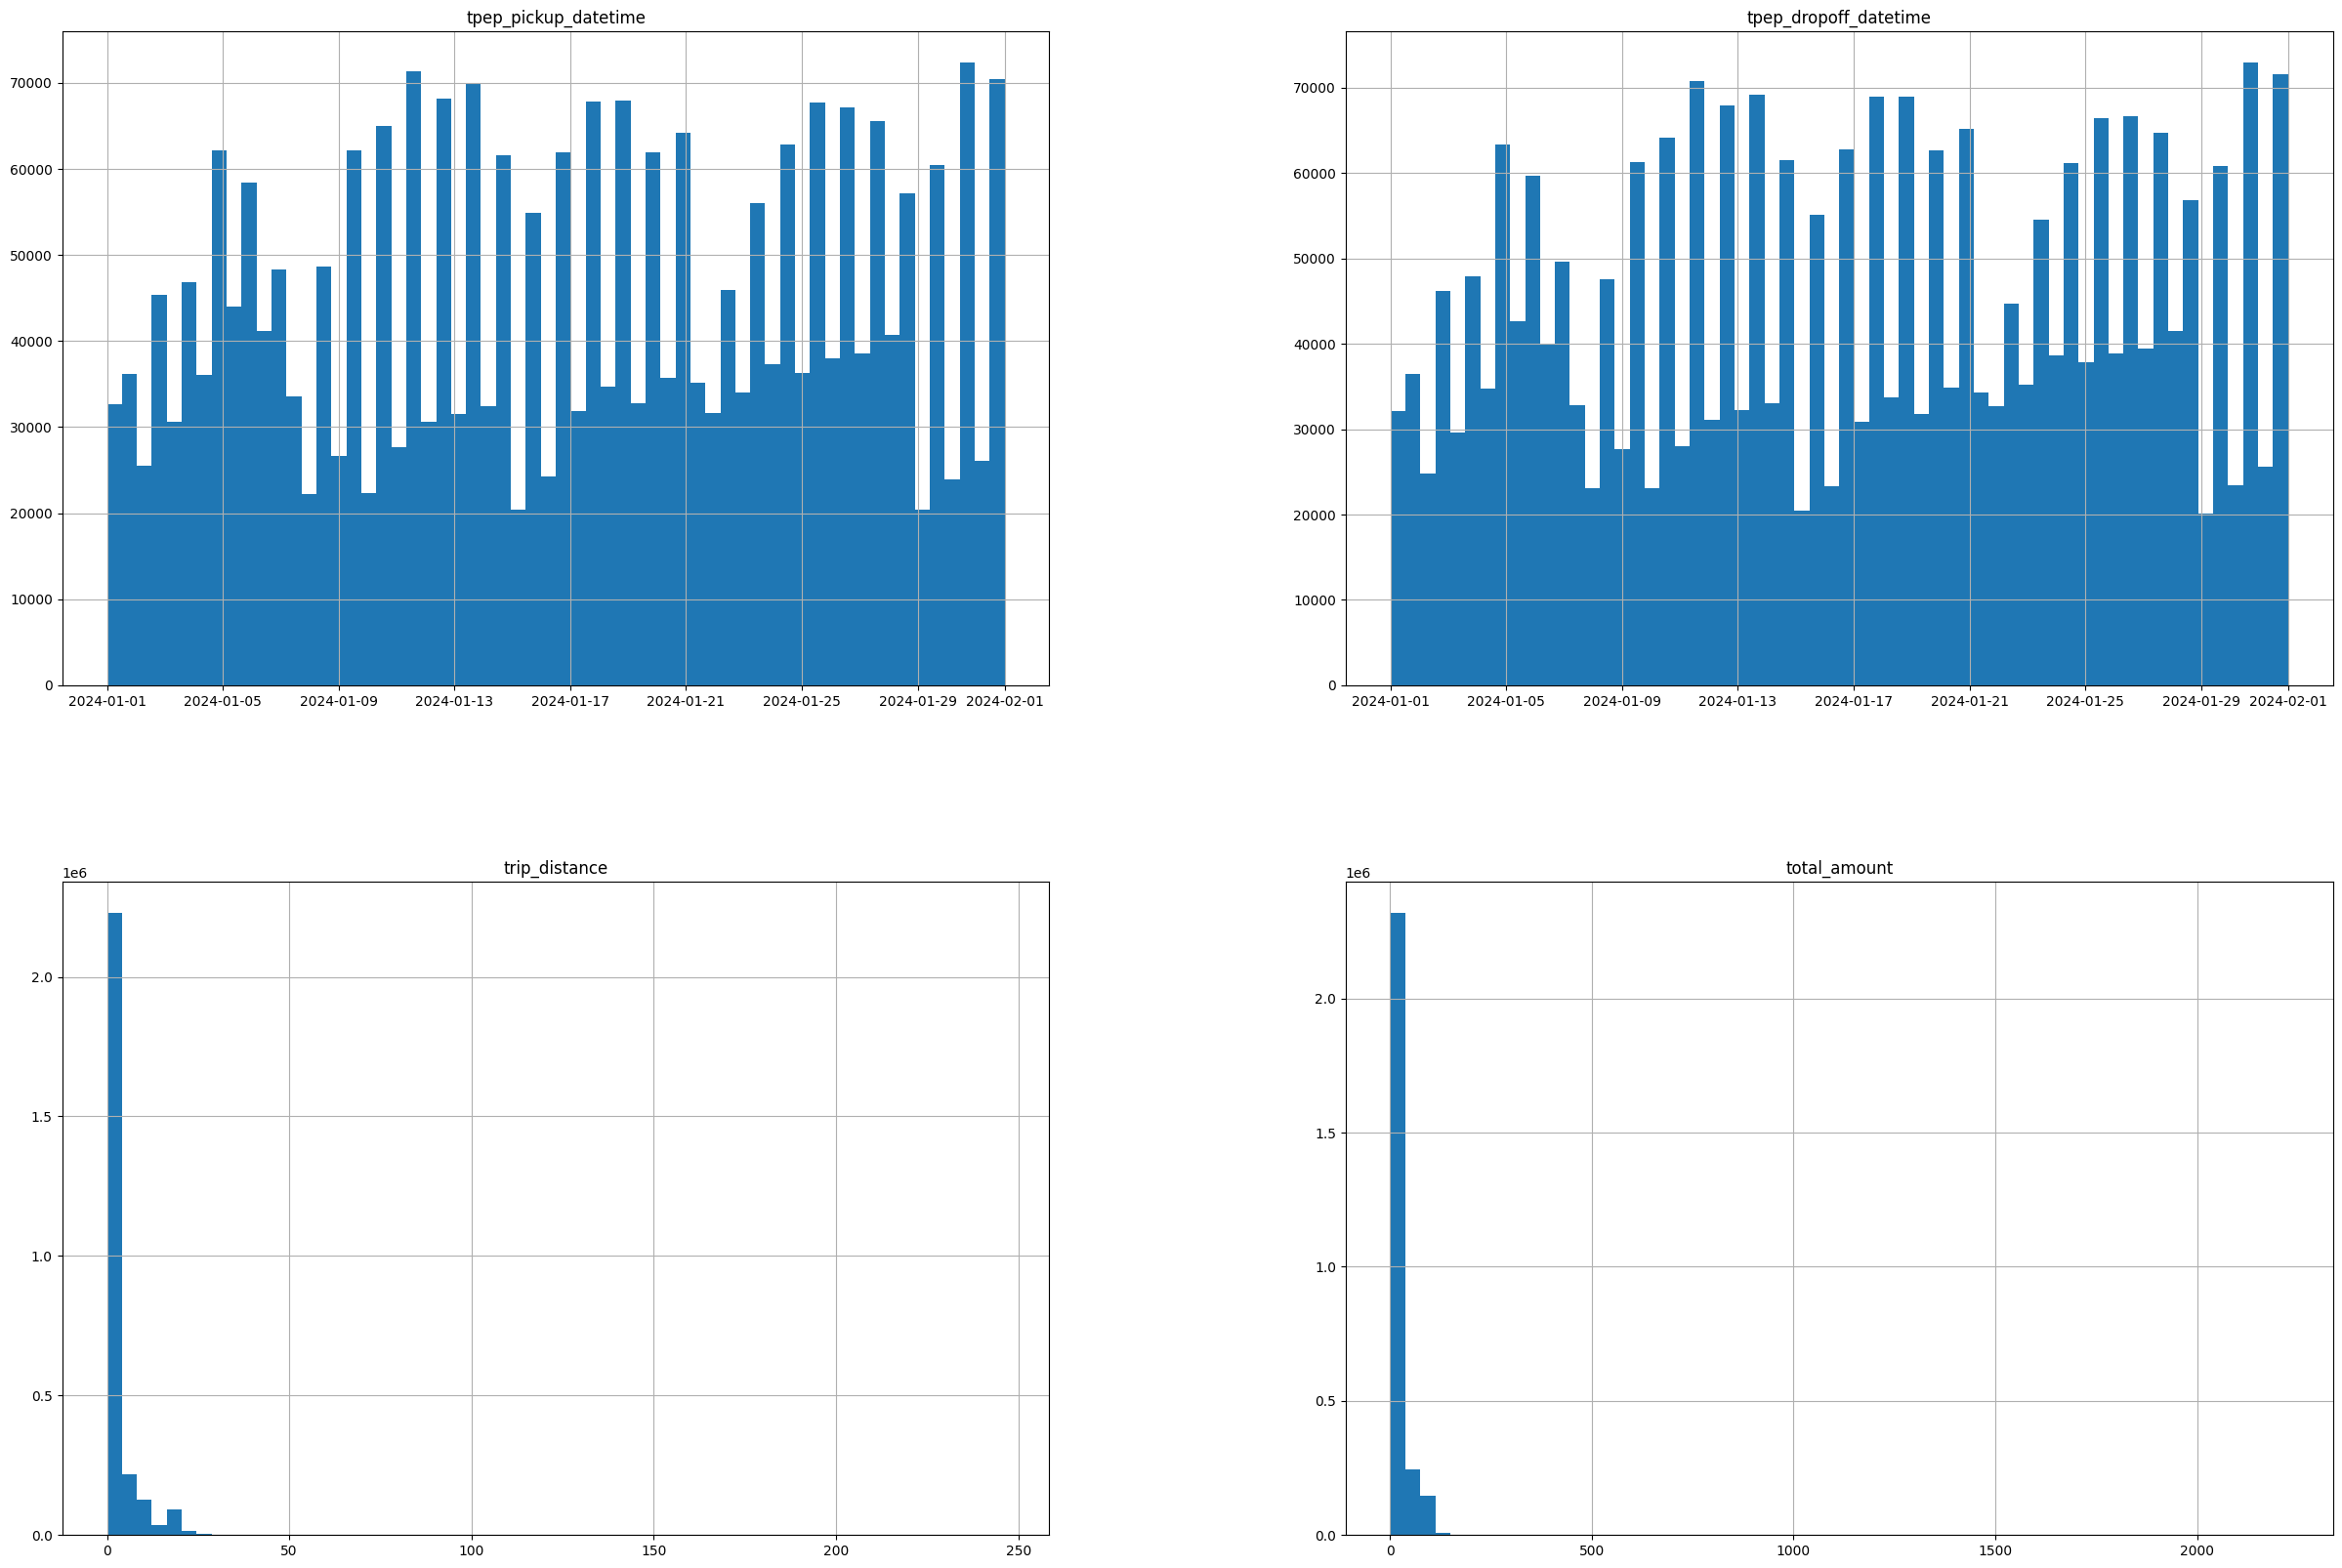

In [ ]:
taxi_df_cleaned.hist(figsize=(30,20), bins=60)